https://www.kaggle.com/code/greenloh/f1-data-analys - imppppppppppppppp

so lets analysis formula 1 based on certain data sets....

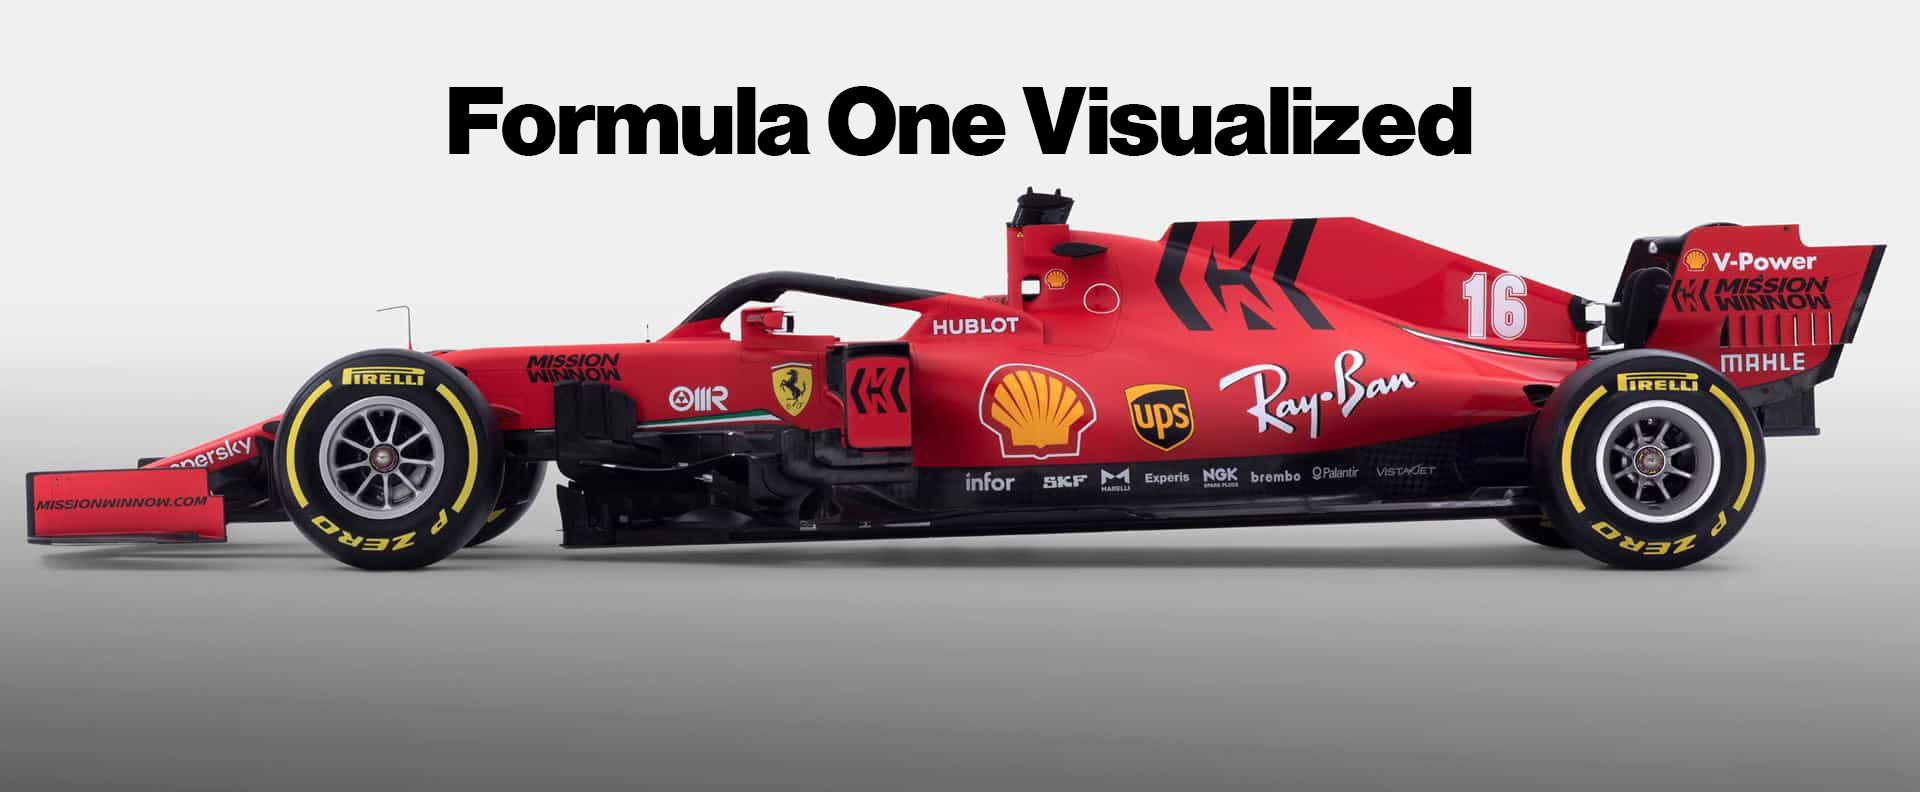

![Formula_one](formula.jpg)

In [16]:
# ![Formula_one](formula.jpg)
# here we use this code to print the image as markdown cell.

so before start lets give an explanation to formula one what it is.




Formula 1 (F1) is a type of open-wheel single-seater auto racing, and it is considered the pinnacle of motorsports. It involves a series of high-speed races held on circuits around the world, featuring cars that are specially designed and built for the purpose of racing. 

The F1 World Championship is organized by the Fédération Internationale de l'Automobile (FIA) and consists of a series of races, or "Grands Prix," held over the course of a season. The drivers compete for points based on their finishing positions in each race, and the driver and constructor with the most points at the end of the season are declared the world champions.

F1 cars are extremely powerful and can reach speeds of up to 370 km/h (230 mph). They are also highly advanced, with features such as aerodynamic wings, complex suspension systems, and hybrid powertrains that combine a gasoline engine with an electric motor. The sport has a huge following around the world, with millions of fans tuning in to watch the races and follow their favorite teams and drivers.

The 2021 Formula 1 season was the 72nd season of the FIA Formula One World Championship. It consisted of 23 races held in different countries around the world from March to December 2021.

The season saw Lewis Hamilton of Mercedes and Max Verstappen of Red Bull Racing battle it out for the drivers' championship. Verstappen took an early lead in the championship and held onto it for much of the season, but Hamilton managed to close the gap and take the lead with a win at the Saudi Arabian Grand Prix.

In the end, Hamilton won his eighth drivers' championship, becoming the most successful driver in the history of the sport. Verstappen finished second in the championship, just 7 points behind Hamilton, after a thrilling season-long battle between the two drivers.

In the constructors' championship, Mercedes won their eighth consecutive title, with Red Bull Racing finishing as runners-up. The season also saw a number of exciting races and impressive performances from drivers such as Lando Norris, Charles Leclerc, and Sergio Perez.

In [1]:
data_dir = './formula_1/'

In [2]:
import os

In [3]:
os.listdir(data_dir)

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

so we have bunch of csv files of formula one.
we dont need many of this and we are going to take the only things that are needed for annalysis

## Data prepration and cleaning



The data is already pretty clean, especially the newer seasons. In the earlier seasons 1950's - 2000's some data may be missing. Missing data is indicated with '\N'. 


In [4]:
#for prepration and cleaning we can import 2 main libraries 

import pandas as pd
import numpy as np

In [5]:
# circuit_df = pd.read_csv('./formula_1/circuits.csv')  or 
circuits_df = pd.read_csv(data_dir +'/circuits.csv')

Yes, the two lines of code have the same purpose, which is to read the contents of the `circuits.csv` file into a pandas DataFrame. However, they use different methods to specify the file path:

The first line of code:

```
circuit_df = pd.read_csv('./formula_1/circuits.csv')
```

uses a relative file path, which starts with a `./` to indicate that the file is located in the current working directory, and then specifies the folder path and file name.

The second line of code:

```
circuits_df = pd.read_csv(data_dir +'/circuits.csv')
```

uses an absolute file path, which is stored in the `data_dir` variable, and then concatenates the folder path and file name using the `+` operator.

Both methods are valid and will achieve the same result if the file exists in the specified location. However, the absolute file path method may be more flexible if you want to read files from different directories or if you want to specify the file path dynamically using variables.

In [6]:
circuits_df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [9]:
circuits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [8]:
circuits_df.columns

Index(['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng',
       'alt', 'url'],
      dtype='object')

In [7]:
constructors_df = pd.read_csv(data_dir + '/constructors.csv')
constructors_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [10]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [11]:
constructors_df.columns

Index(['constructorId', 'constructorRef', 'name', 'nationality', 'url'], dtype='object')

In [12]:
drivers_df = pd.read_csv(data_dir + '/drivers.csv')

In [13]:
drivers_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou
854,856,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [14]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [15]:
races_df = pd.read_csv(data_dir + 'races.csv')

In [16]:
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1116,2023,19,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1098,1117,2023,20,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1099,1118,2023,21,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1100,1119,2023,22,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [17]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [18]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


In [19]:
status_df = pd.read_csv(data_dir + '/status.csv')

In [20]:
status_df

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


here we are loading all the base csv file. (This files doesnt have a foreign key)

In [14]:
circuits_df = pd.read_csv(data_dir + '/circuits.csv')
constructors_df = pd.read_csv(data_dir + '/constructors.csv')
drivers_df = pd.read_csv(data_dir + '/drivers.csv')
races_df = pd.read_csv(data_dir + '/races.csv')
status_df = pd.read_csv(data_dir + '/status.csv')

In [20]:
# constructors_df['name_x'] = constructors_df.name
# constructors_df.drop(['name'],axis=1,inplace=True)

In [21]:
constructors_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [22]:
constructors_df.columns

Index(['constructorId', 'constructorRef', 'nationality', 'url', 'name_x'], dtype='object')

In [23]:
os.listdir(data_dir)

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [22]:
lap_time_df = pd.read_csv(data_dir + '/lap_times.csv')

In [23]:
lap_time_df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
538116,1096,822,53,16,1:32.998,92998
538117,1096,822,54,16,1:32.995,92995
538118,1096,822,55,16,1:31.236,91236
538119,1096,822,56,15,1:30.566,90566


here we can see the laptime contain both raceid and drivers id so we can concatinate the 3 files together to form new file.

In [27]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [28]:
drivers_df.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [24]:
lap_time_df = pd.merge(lap_time_df, races_df, on='raceId')
lap_time_df = pd.merge(lap_time_df, drivers_df, on= 'driverId')

In [29]:
lap_time_df

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,sprint_date,sprint_time,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,20,1,1,1:38.109,98109,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,20,2,1,1:33.006,93006,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,20,3,1,1:32.713,92713,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,20,4,1,1:32.803,92803,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,20,5,1,1:32.342,92342,2011,1,1,Australian Grand Prix,...,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538116,1089,856,49,9,1:45.070,105070,2022,16,14,Italian Grand Prix,...,\N,\N,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
538117,1089,856,50,9,2:02.781,122781,2022,16,14,Italian Grand Prix,...,\N,\N,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
538118,1089,856,51,9,1:31.836,91836,2022,16,14,Italian Grand Prix,...,\N,\N,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
538119,1089,856,52,9,1:29.693,89693,2022,16,14,Italian Grand Prix,...,\N,\N,de_vries,45,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries


In [30]:
lap_time_df.columns

Index(['raceId', 'driverId', 'lap', 'position', 'time_x', 'milliseconds',
       'year', 'round', 'circuitId', 'name', 'date', 'time_y', 'url_x',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverRef',
       'number', 'code', 'forename', 'surname', 'dob', 'nationality', 'url_y'],
      dtype='object')

In [31]:
lap_time_df.drop(['raceId','driverId','url_x','circuitId','url_y','driverRef'], axis=1, inplace=True)
lap_time_df.info

<bound method DataFrame.info of         lap  position    time_x  milliseconds  year  round  \
0         1         1  1:38.109         98109  2011      1   
1         2         1  1:33.006         93006  2011      1   
2         3         1  1:32.713         92713  2011      1   
3         4         1  1:32.803         92803  2011      1   
4         5         1  1:32.342         92342  2011      1   
...     ...       ...       ...           ...   ...    ...   
538116   49         9  1:45.070        105070  2022     16   
538117   50         9  2:02.781        122781  2022     16   
538118   51         9  1:31.836         91836  2022     16   
538119   52         9  1:29.693         89693  2022     16   
538120   53         9  2:02.870        122870  2022     16   

                         name        date    time_y    fp1_date  ...  \
0       Australian Grand Prix  2011-03-27  06:00:00          \N  ...   
1       Australian Grand Prix  2011-03-27  06:00:00          \N  ...   
2      

In [32]:
lap_time_df

,lap,position,time_x,milliseconds,year,round,name,date,time_y,fp1_date,...,quali_date,quali_time,sprint_date,sprint_time,number,code,forename,surname,dob,nationality
0,1,1,1:38.109,98109,2011,1,Australian Grand Prix,2011-03-27,06:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
1,2,1,1:33.006,93006,2011,1,Australian Grand Prix,2011-03-27,06:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
2,3,1,1:32.713,92713,2011,1,Australian Grand Prix,2011-03-27,06:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
3,4,1,1:32.803,92803,2011,1,Australian Grand Prix,2011-03-27,06:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
4,5,1,1:32.342,92342,2011,1,Australian Grand Prix,2011-03-27,06:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538116,49,9,1:45.070,105070,2022,16,Italian Grand Prix,2022-09-11,13:00:00,2022-09-09,...,2022-09-10,14:00:00,\N,\N,45,DEV,Nyck,de Vries,1995-02-06,Dutch
538117,50,9,2:02.781,122781,2022,16,Italian Grand Prix,2022-09-11,13:00:00,2022-09-09,...,2022-09-10,14:00:00,\N,\N,45,DEV,Nyck,de Vries,1995-02-06,Dutch
538118,51,9,1:31.836,91836,2022,16,Italian Grand Prix,2022-09-11,13:00:00,2022-09-09,...,2022-09-10,14:00:00,\N,\N,45,DEV,Nyck,de Vries,1995-02-06,Dutch
538119,52,9,1:29.693,89693,2022,16,Italian Grand Prix,2022-09-11,13:00:00,2022-09-09,...,2022-09-10,14:00:00,\N,\N,45,DEV,Nyck,de Vries,1995-02-06,Dutch


In [33]:
lap_time_df.columns

Index(['lap', 'position', 'time_x', 'milliseconds', 'year', 'round', 'name',
       'date', 'time_y', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality'],
      dtype='object')

In [25]:
# lap_time_df.nationality_y

In [26]:
# import pandas as pd

# # read the data into a DataFrame
# df =lap_time_df

# # check if the two columns have the same values
# same_nationality = df['nationality_x'] == df['nationality_y']

# # print the result
# print(same_nationality)
# same_nationality.unique()


In [34]:
lap_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538121 entries, 0 to 538120
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   lap           538121 non-null  int64 
 1   position      538121 non-null  int64 
 2   time_x        538121 non-null  object
 3   milliseconds  538121 non-null  int64 
 4   year          538121 non-null  int64 
 5   round         538121 non-null  int64 
 6   name          538121 non-null  object
 7   date          538121 non-null  object
 8   time_y        538121 non-null  object
 9   fp1_date      538121 non-null  object
 10  fp1_time      538121 non-null  object
 11  fp2_date      538121 non-null  object
 12  fp2_time      538121 non-null  object
 13  fp3_date      538121 non-null  object
 14  fp3_time      538121 non-null  object
 15  quali_date    538121 non-null  object
 16  quali_time    538121 non-null  object
 17  sprint_date   538121 non-null  object
 18  sprint_time   538121 non

In [35]:
lap_time_df.sample(5)

,lap,position,time_x,milliseconds,year,round,name,date,time_y,fp1_date,...,quali_date,quali_time,sprint_date,sprint_time,number,code,forename,surname,dob,nationality
429300,11,5,1:37.082,97082,2005,2,Malaysian Grand Prix,2005-03-20,15:00:00,\N,...,\N,\N,\N,\N,\N,SCH,Ralf,Schumacher,1975-06-30,German
1353,48,9,1:29.250,89250,2012,5,Spanish Grand Prix,2012-05-13,12:00:00,\N,...,\N,\N,\N,\N,5,VET,Sebastian,Vettel,1987-07-03,German
68452,57,7,1:16.677,76677,2000,2,Brazilian Grand Prix,2000-03-26,\N,\N,...,\N,\N,\N,\N,22,BUT,Jenson,Button,1980-01-19,British
59695,45,4,1:26.575,86575,2009,8,British Grand Prix,2009-06-21,12:00:00,\N,...,\N,\N,\N,\N,19,MAS,Felipe,Massa,1981-04-25,Brazilian
41706,6,12,1:20.368,80368,2007,8,French Grand Prix,2007-07-01,12:00:00,\N,...,\N,\N,\N,\N,\N,WEB,Mark,Webber,1976-08-27,Australian


In [29]:
os.listdir(data_dir)

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [36]:
results_df = pd.read_csv(data_dir + '/results.csv')

In [37]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47,12,16,16,16,0.0,57,\N,\N,39,12,1:29.833,211.632,11
25836,25842,1096,825,210,20,16,17,17,17,0.0,57,\N,\N,40,20,1:31.158,208.556,11
25837,25843,1096,1,131,44,5,18,18,18,0.0,55,\N,\N,42,11,1:29.788,211.738,9
25838,25844,1096,849,3,6,20,19,19,19,0.0,55,\N,\N,45,14,1:30.309,210.517,130


In [38]:
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [37]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [39]:
results_df = pd.merge(results_df, races_df, on='raceId')
results_df = pd.merge(results_df, drivers_df, on='driverId')
results_df = pd.merge(results_df, constructors_df, on='constructorId')
results_df = pd.merge(results_df, status_df, on='statusId')


In [40]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25840 entries, 0 to 25839
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number_x         25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time_x           25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [41]:
results_df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name_x',
       'date', 'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date',
       'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time',
       'sprint_date', 'sprint_time', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_y',
       'constructorRef', 'name_y', 'nationality_y', 'url', 'status'],
      dtype='object')

In [42]:
results_df.drop(['resultId','raceId','driverId','constructorId','number_x'
                ,'positionText','positionOrder','url_y','url_x','constructorRef','driverRef','driverRef'
                ,'dob','time_x','time_y'],axis=1,inplace=True)

In [43]:
results_df

,grid,position,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,...,sprint_time,number_y,code,forename,surname,nationality_x,name_y,nationality_y,url,status
0,1,1,10.0,58,5690616,39,2,1:27.452,218.300,1,...,\N,44,HAM,Lewis,Hamilton,British,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,9,5,4.0,56,5525103,53,3,1:35.462,209.033,1,...,\N,44,HAM,Lewis,Hamilton,British,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,5,3,6.0,66,5903238,20,3,1:22.017,204.323,1,...,\N,44,HAM,Lewis,Hamilton,British,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,3,2,8.0,58,5213230,31,2,1:26.529,222.085,1,...,\N,44,HAM,Lewis,Hamilton,British,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,3,1,10.0,76,7242742,71,6,1:18.510,153.152,1,...,\N,44,HAM,Lewis,Hamilton,British,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,14,17,0.0,176,\N,\N,\N,\N,\N,117,...,\N,\N,\N,Walt,Faulkner,American,Kurtis Kraft,American,http://en.wikipedia.org/wiki/Kurtis_Kraft,+24 Laps
25836,14,17,0.0,176,\N,\N,\N,\N,\N,117,...,\N,\N,\N,Johnny,Mantz,American,Kurtis Kraft,American,http://en.wikipedia.org/wiki/Kurtis_Kraft,+24 Laps
25837,9,13,0.0,79,\N,\N,\N,\N,\N,120,...,\N,\N,\N,Jo,Bonnier,Swedish,Porsche,German,http://en.wikipedia.org/wiki/Porsche_in_Formul...,+21 Laps
25838,20,15,0.0,44,\N,\N,\N,\N,\N,125,...,\N,\N,\N,Horace,Gould,British,Cooper,British,http://en.wikipedia.org/wiki/Cooper_Car_Company,+46 Laps


In [44]:
results_df.columns

Index(['grid', 'position', 'points', 'laps', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year',
       'round', 'circuitId', 'name_x', 'date', 'fp1_date', 'fp1_time',
       'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date',
       'quali_time', 'sprint_date', 'sprint_time', 'number_y', 'code',
       'forename', 'surname', 'nationality_x', 'name_y', 'nationality_y',
       'url', 'status'],
      dtype='object')

In [37]:
# results_df = results_df.loc[:,~df.columns.duplicated()]

In [38]:
# results_df = results_df.loc[:, ~results_df.columns.duplicated()]

In [45]:
# results_df.columns

In [46]:
results_df.sample(5)

,grid,position,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,...,sprint_time,number_y,code,forename,surname,nationality_x,name_y,nationality_y,url,status
12265,4,\N,0.0,0,\N,\N,\N,\N,\N,20,...,\N,\N,\N,Jean,Alesi,French,Tyrrell,British,http://en.wikipedia.org/wiki/Tyrrell_Racing,Spun off
124,10,4,5.0,70,5539174,46,3,1:17.134,205.870,1,...,\N,\N,KOV,Heikki,Kovalainen,Finnish,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
19711,0,\N,0.0,0,\N,\N,\N,\N,\N,54,...,\N,\N,\N,Jack,Brabham,Australian,Brabham-Repco,British,http://en.wikipedia.org/wiki/Brabham,Withdrew
13903,14,\N,0.0,14,\N,\N,\N,\N,\N,23,...,\N,\N,\N,Innes,Ireland,British,Team Lotus,British,http://en.wikipedia.org/wiki/Team_Lotus,Brakes
15439,18,\N,0.0,11,\N,\N,\N,\N,\N,5,...,\N,\N,\N,Andrea,de Cesaris,Italian,Sauber,Swiss,http://en.wikipedia.org/wiki/Sauber,Engine


In [41]:
# if results_df['code_x'].equals(results_df['code_y']) and results_df['code_x'].equals(results_df['code']):
#     print('The values in the columns are the same')
# else:
#     print('The values in the columns are not the same')


In [42]:
# # results_df['code'] = np.where((results_df['code_x'] == results_df['code_y']) & (results_df['code_x'] == results_df['code']),results_df['code'],np.nan)

# or

# results_df.loc[(results_df['code_x'] == results_df['code_y']) & (results_df['code_x'] == results_df['code']), 'code'] = results_df['code_x']
# results_df.loc[(results_df['code_x'] != results_df['code_y']) & (results_df['code_x'] == results_df['code']), 'code'] = np.nan
# results_df.loc[(results_df['code_x'] != results_df['code_y']) & (results_df['code_y'] == results_df['code']), 'code'] = np.nan


In [43]:
# results_df.drop(['code_x','code_y'],axis=1, inplace=True)

At last we create a dataframe with pitstop information. The goal is to get the full name of the constructor for each pitstop time. As the pit_stops_df has no constructorId, we need to link using raceId and driverId.

In [45]:
os.listdir(data_dir)

['circuits.csv',
 'constructors.csv',
 'constructor_results.csv',
 'constructor_standings.csv',
 'drivers.csv',
 'driver_standings.csv',
 'lap_times.csv',
 'pit_stops.csv',
 'qualifying.csv',
 'races.csv',
 'results.csv',
 'seasons.csv',
 'sprint_results.csv',
 'status.csv']

In [47]:
pit_stop_df = pd.read_csv(data_dir + '/pit_stops.csv')

In [48]:
pit_stop_df

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [49]:
pit_stop_df = pd.merge(pit_stop_df,races_df , on='raceId')
pit_stop_df = pd.merge(pit_stop_df, drivers_df, on='driverId')
result2_df = pd.read_csv(data_dir + '/results.csv')
pit_stop_df = pd.merge(pit_stop_df, result2_df,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId'])

In [50]:
pit_stop_df


,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,year,round,circuitId,...,positionOrder,points,laps,time,milliseconds_y,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,153,2,17,17:31:06,24.463,24463,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
2,841,153,3,35,17:59:45,26.348,26348,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
3,842,153,1,16,16:32:25,23.584,23584,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
4,842,153,2,32,17:00:55,22.888,22888,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1095,855,1,16,15:27:16,24.332,24332,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9630,1095,855,2,37,15:54:45,25.111,25111,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9631,1096,855,1,15,17:26:28,22.435,22435,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11
9632,1096,855,2,44,18:11:10,23.159,23159,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11


In [51]:
pit_stop_df.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration',
       'milliseconds_x', 'year', 'round', 'circuitId', 'name', 'date',
       'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'driverRef', 'number_x', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url_y', 'resultId', 'constructorId', 'number_y',
       'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'milliseconds_y', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [52]:
races_df.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')

In [53]:
drivers_df.columns

Index(['driverId', 'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url'],
      dtype='object')

In [50]:
# pit_stop_df = pd.merge(pit_stop_df, constructors_df, on='constructorId')
# pit_stop_df = pit_stop_df[['milliseconds_x', 'year_x', 'round_x', 'name_x', 'name_y']]
# pit_stop_df.info()

In [51]:
# pit_stop_df.drop_duplicates(inplace=True)

In [52]:
pit_stop_df

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,year,round,circuitId,...,positionOrder,points,laps,time,milliseconds_y,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,153,2,17,17:31:06,24.463,24463,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
2,841,153,3,35,17:59:45,26.348,26348,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
3,842,153,1,16,16:32:25,23.584,23584,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
4,842,153,2,32,17:00:55,22.888,22888,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1095,855,1,16,15:27:16,24.332,24332,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9630,1095,855,2,37,15:54:45,25.111,25111,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9631,1096,855,1,15,17:26:28,22.435,22435,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11
9632,1096,855,2,44,18:11:10,23.159,23159,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11


In [53]:
pit_stop_df.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration',
       'milliseconds_x', 'year', 'round', 'circuitId', 'name', 'date',
       'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'driverRef', 'number_x', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url_y', 'resultId', 'constructorId', 'number_y',
       'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'milliseconds_y', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [54]:
# pit_stop_df = pit_stop_df.drop_duplicates(subset=['name_x', 'name_y'], inplace=True)

In [55]:
pit_stop_df

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,year,round,circuitId,...,positionOrder,points,laps,time,milliseconds_y,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,153,1,1,17:05:23,26.898,26898,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
1,841,153,2,17,17:31:06,24.463,24463,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
2,841,153,3,35,17:59:45,26.348,26348,2011,1,1,...,11,0.0,57,\N,\N,41,10,1:30.467,211.025,11
3,842,153,1,16,16:32:25,23.584,23584,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
4,842,153,2,32,17:00:55,22.888,22888,2011,2,2,...,14,0.0,55,\N,\N,37,17,1:43.744,192.346,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9629,1095,855,1,16,15:27:16,24.332,24332,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9630,1095,855,2,37,15:54:45,25.111,25111,2022,21,18,...,12,0.0,71,+29.325,5943369,64,17,1:15.802,204.643,1
9631,1096,855,1,15,17:26:28,22.435,22435,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11
9632,1096,855,2,44,18:11:10,23.159,23159,2022,22,24,...,12,0.0,57,\N,\N,53,8,1:29.600,212.183,11


In [57]:
pit_stop_df.columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration',
       'milliseconds_x', 'year', 'round', 'circuitId', 'name', 'date',
       'time_y', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time',
       'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date',
       'sprint_time', 'driverRef', 'number_x', 'code', 'forename', 'surname',
       'dob', 'nationality', 'url_y', 'resultId', 'constructorId', 'number_y',
       'grid', 'position', 'positionText', 'positionOrder', 'points', 'laps',
       'time', 'milliseconds_y', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')

In [58]:
pit_stop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9634 entries, 0 to 9633
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           9634 non-null   int64  
 1   driverId         9634 non-null   int64  
 2   stop             9634 non-null   int64  
 3   lap              9634 non-null   int64  
 4   time_x           9634 non-null   object 
 5   duration         9634 non-null   object 
 6   milliseconds_x   9634 non-null   int64  
 7   year             9634 non-null   int64  
 8   round            9634 non-null   int64  
 9   circuitId        9634 non-null   int64  
 10  name             9634 non-null   object 
 11  date             9634 non-null   object 
 12  time_y           9634 non-null   object 
 13  url_x            9634 non-null   object 
 14  fp1_date         9634 non-null   object 
 15  fp1_time         9634 non-null   object 
 16  fp2_date         9634 non-null   object 
 17  fp2_time      

In [62]:
pit_stop_df = pit_stop_df[['milliseconds_x', 'year', 'round', 'name']]
pit_stop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9634 entries, 0 to 9633
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   milliseconds_x  9634 non-null   int64 
 1   year            9634 non-null   int64 
 2   round           9634 non-null   int64 
 3   name            9634 non-null   object
dtypes: int64(3), object(1)
memory usage: 376.3+ KB


In [63]:
pit_stop_df.sample(5)

,milliseconds_x,year,round,name
335,20024,2012,3,Chinese Grand Prix
6073,22311,2021,4,Spanish Grand Prix
8317,22381,2019,5,Spanish Grand Prix
8995,23381,2019,20,Brazilian Grand Prix
3934,14780,2012,8,European Grand Prix
